<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-dataset" data-toc-modified-id="Import-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import dataset</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Test-model" data-toc-modified-id="Test-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test model</a></span></li></ul></div>

In [1]:
#import libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

## Import dataset


In [2]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
df.shape

(891, 15)

## Preprocessing 

In [5]:
df_final = df.drop(columns=['class', 'adult_male', 'embark_town', 'alive', 'deck', 'parch'])

In [7]:
df_final.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
fare          0
embarked      2
who           0
alone         0
dtype: int64

In [54]:
df_final.embarked.unique()
df_final['embarked'].mode()
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [57]:
import numpy as np
df.loc[:,['embarked']] = df.loc[:,['embarked']].replace("Q", df['embarked'].mode())
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [49]:
df.embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:xlabel='embarked', ylabel='fare'>

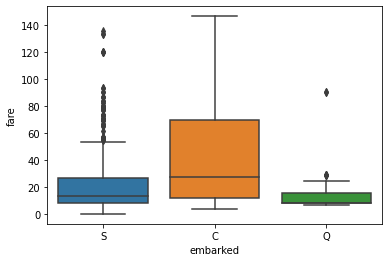

In [14]:
sns.boxplot(data = df_final[df_final['fare']<150][['embarked','fare']], x = 'embarked', y='fare')

In [7]:
df_final['alone'] = df_final['alone'].replace([True, False], [1, 0])
df_final['adult'] = df_final['who'].replace(["man", "woman", 'child'],
                                            [1, 1, 0])
df_final = df_final.drop(columns=['who'])
df_final['sex'] = df_final['sex'].replace(['male', 'female'], [1, 0])
df_final['embarked'] = df_final['embarked'].replace(['C', 'Q', 'S'], [0, 1, 2])
df_final.replace(np.nan,
                 np.mean(df_final[df_final['adult'] == 1]['adult']),
                 inplace=True)

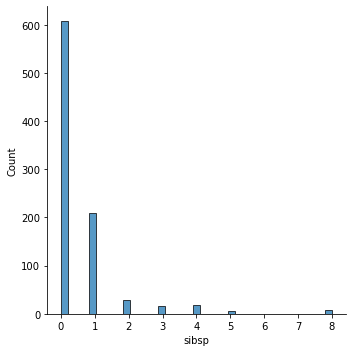

In [19]:
sns.displot(df_final.sibsp)

In [33]:
group_age = df_final[['adult', 'survived', 'age']].groupby(by = ['adult', 'survived']).count()
group_age
#sns.barplot(data= group_age, x= 'adult', hue = 'survived')

age
adult survived     
0     0          34
      1          49
1     0         515
      1         293

## Fit Model

In [54]:
y = df_final['survived']
X = df_final.drop(columns=['survived'])
X.head()

,pclass,sex,age,sibsp,fare,embarked,alone,adult
0,3,1,22.0,1,7.2500,2.0,0,1
1,1,0,38.0,1,71.2833,0.0,0,1
2,3,0,26.0,0,7.9250,2.0,1,1
3,1,0,35.0,1,53.1000,2.0,0,1
4,3,1,35.0,0,8.0500,2.0,1,1


In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y)

In [56]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 8)
X_test shape: (179, 8)
y_train shape: (712,)
y_test shape: (179,)


In [59]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

In [60]:
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
logreg.score(X_test, y_test)

0.8156424581005587

## Test model

In [62]:
for col in df_final.columns[1:]:
    if len(df_final[col].unique())>5:
        print(f"{col}:[{df_final[col].min()}, {df_final[col].mean()} {df_final[col].max()}]")
    else:
        print(f"{col}:{df_final[col].unique()}")

pclass:[3 1 2]
sex:[1 0]
age:[0.42, 23.997946127946125 80.0]
sibsp:[0, 0.5230078563411896 8]
fare:[0.0, 32.2042079685746 512.3292]
embarked:[2. 0. 1.]
alone:[0 1]
adult:[1 0]


In [63]:
X_prediction_dict = {col: [0] for col in df_final.columns[1:]}
X_prediction_dict
X_prediction = pd.DataFrame(X_prediction_dict)

X_prediction.pclass = 3
X_prediction.sex = 0
X_prediction.age = 19
X_prediction.sibsp = 2
X_prediction.fare = 30
X_prediction.embarked = 1.
X_prediction.alone = 1 if sibsp > 1 else 0
X_prediction.adult = 1 if age > 18 else 0


In [64]:
X_prediction

,pclass,sex,age,sibsp,fare,embarked,alone,adult
0,3,0,19,2,30,1.0,1,1


In [66]:
logreg.predict_proba(X_prediction)

array([[0.61313218, 0.38686782]])